FINAL PROJECT

dataset: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

**DAFTAR ISI**

1. Import relevant libraries
2. Set Up the current working directory & Import Dataset
3. Exploratory Data Analysis (EDA)
4. Count Categorical Value
5. Mengubah Nominal Variabel
6. Clean the Dataset
7. Visualizations
8. Scalling
9. Modelling
10. Evaluation




## 1. Import relevant libraries##

In [83]:
# 1. Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as plto

## 2.   Set Up the current working directory & Import Dataset ##

In [84]:
# 2. Set Up the current working directory & Import Dataset
df= pd.read_csv('song_data.csv')
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


# 3. Exploratory Data Analysis (EDA)

In [86]:
# 3. Evaluate Data Structure
df.describe() # informasi statistik dasar

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [87]:
# cek missing values
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [88]:
# Melakukan value counts untuk setiap kolom
value_counts_zeros = df.apply(lambda x: x.value_counts().get(0, 0))

# Menampilkan hasil
value_counts_zeros

song_name             21
song_popularity      272
song_duration_ms       0
acousticness           0
danceability           2
energy                 0
instrumentalness    7150
key                 2182
liveness               0
loudness               0
audio_mode          7004
speechiness            2
tempo                  2
time_signature         3
audio_valence          2
dtype: int64

# 4. Count Categorical Value

In [89]:
# Mendapatkan unique values
unique_values = df['time_signature'].unique()

# Mendapatkan value counts
value_counts= df['time_signature'].value_counts()

# Menampilkan hasil
print("Values Dari Kolom Time Signature :", unique_values)
print("Penghitungan Jumlah setiap value :")
print(value_counts)

Values Dari Kolom Time Signature : [4 3 1 5 0]
Penghitungan Jumlah setiap value :
4    17754
3      772
5      233
1       73
0        3
Name: time_signature, dtype: int64


## Time Signature Menggunakan Kategori Numerik

4/4	= 4
3/4	= 3
2/4	= 2
5/4	= 5
1/4 = 1
0/4 = 0

## Penjelasan Pengkategorian

Pengkategorian ini dikategorikan berdasarkan ketukan ditiap biramanya,dimana contoh kategori 4,berarti untuk birama 4/4,kategori 2 untuk birama 2/4,dsb

In [90]:
mode_0=(df['audio_mode'] == 0).sum()
mode_1=(df['audio_mode'] == 1).sum()

print(f"Mono Format Audio Song = 0 : {mode_0}")
print(f"Stereo Format Audio Song = 1 : {mode_1}")

Mono Format Audio Song = 0 : 7004
Stereo Format Audio Song = 1 : 11831


## Pengkategorian Audio Mode

0 = Mono
1 = Stereo

## Penjelasan Pengkategorian

Pengkategorian ini dikategorikan berdasar jenis audio,dimana kategori yang umum digunakan adalah 0 untuk mono dan 1 untuk stereo

In [91]:
# Mendapatkan unique values
unique_values = df['key'].unique()

# Mendapatkan value counts
value_counts_key = df['key'].value_counts()

# Menampilkan hasil
print("Values Dari Kolom Time Signature :", unique_values)
print("Penghitungan Jumlah setiap value :")
print(value_counts_key)

Values Dari Kolom Time Signature : [ 8  3  0 10  4  2  1  9  7 11  5  6]
Penghitungan Jumlah setiap value :
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64


## Penjelasan Key

Dalam beberapa kasus, kunci bisa dinyatakan sebagai angka. Misalnya, dalam representasi numerik kunci musik, kunci sering diwakili dengan angka 0-11 yang mewakili posisi dalam skala kromatik:

0: C
1: C#
2: D
3: D#
4: E
5: F
6: F#
7: G
8: G#
9: A
10: A#
11: B

# 5. Mengubah Nominal Variabel

In [92]:
# Mengubah nominal dari kolom song_duration_ms menjadi menit
df['song_duration_ms'] = df['song_duration_ms'] / 60000

df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,4.372217,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,3.615550,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,3.862217,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,3.615550,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,3.730433,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,2.660750,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,3.427767,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,3.036850,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,5.871333,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [93]:
df1 = df.rename(columns={'song_duration_ms': 'song_duration_min'})

In [94]:
# Fungsi untuk mengkategorikan tempo
def categorize_tempo(tempo):
    if tempo < 60:
        return 0 #'Largo'
    elif tempo < 76:
        return 1.0 #'Adagio'
    elif tempo < 108:
        return 2 #'Andante'
    elif tempo < 120:
        return 3 #'Moderato'
    elif tempo < 168:
        return 4 #'Allegro'
    elif tempo < 200:
        return 5 #'Presto'
    else :
        return 6 # Prestissimo

# Menambahkan kolom kategori numerik
df1['tempo_category_numeric'] = df1['tempo'].apply(categorize_tempo)
df1.to_csv('song_data_diolah.csv', index=False)

In [95]:
df2 = df1.drop(columns=['tempo'])
df2

,song_name,song_popularity,song_duration_min,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,time_signature,audio_valence,tempo_category_numeric
0,Boulevard of Broken Dreams,73,4.372217,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,4,0.474,4.0
1,In The End,66,3.615550,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,4,0.370,2.0
2,Seven Nation Army,76,3.862217,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,4,0.324,4.0
3,By The Way,74,3.615550,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,4,0.198,4.0
4,How You Remind Me,56,3.730433,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,4,0.574,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,2.660750,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,4,0.300,3.0
18831,Answers,60,3.427767,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,4,0.265,2.0
18832,Sudden Love (Acoustic),23,3.036850,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,4,0.286,4.0
18833,Gentle on My Mind,55,5.871333,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,4,0.323,2.0


# 6. Clean the Dataset

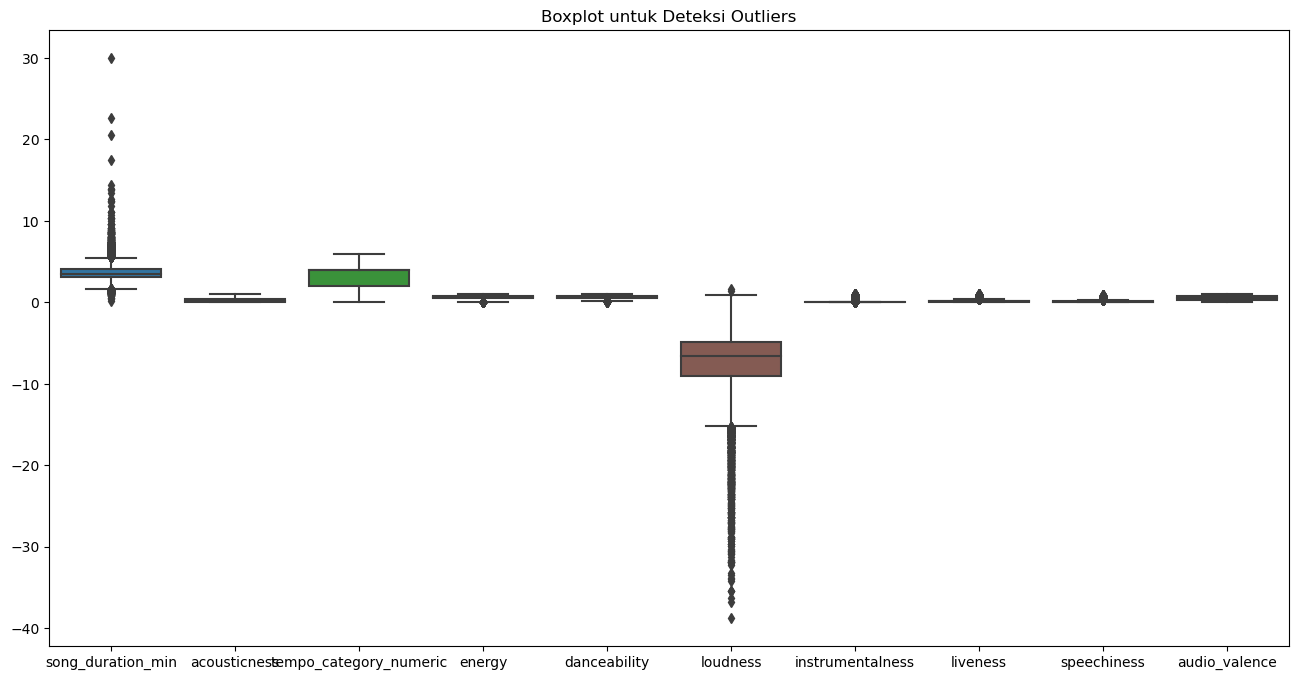

In [96]:
# meskipun tidak memiliki missing values,
# kita masih bisa menemukan outlier lewat boxplots, seperti:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df2[['song_duration_min','acousticness','tempo_category_numeric', 'energy', 'danceability', 'loudness','instrumentalness','liveness','speechiness','audio_valence']])
plt.title('Boxplot untuk Deteksi Outliers')
plt.show()

In [97]:
# Menghitung IQR untuk fitur tertentu
Q1 = df2[['song_duration_min', 'loudness']].quantile(0.25)
Q3 = df2[['song_duration_min', 'loudness']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
df_cleaned = df2[~((df2 < lower_bound) | (df2 > upper_bound)).any(axis=1)]

print(f"Jumlah data sebelum membersihkan outliers: {df2.shape[0]}")
print(f"Jumlah data setelah membersihkan outliers: {df_cleaned.shape[0]}")

C:\Users\ACER\AppData\Local\Temp\ipykernel_9064\1648194067.py:11: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Jumlah data sebelum membersihkan outliers: 18835
Jumlah data setelah membersihkan outliers: 17378


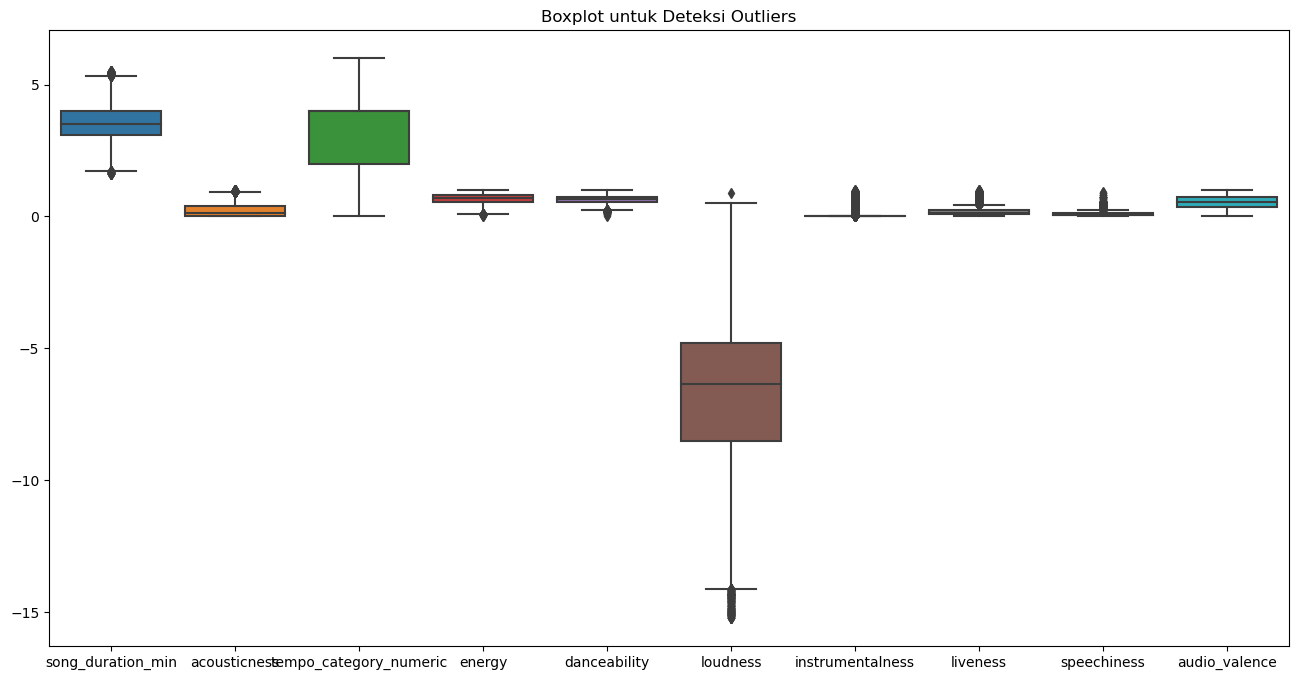

In [98]:
# Visualisasi Box Plot untuk fitur numerik
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_cleaned[['song_duration_min','acousticness','tempo_category_numeric', 'energy', 'danceability', 'loudness','instrumentalness','liveness','speechiness','audio_valence']])
plt.title('Boxplot untuk Deteksi Outliers')
plt.show()

In [99]:
df3 = df_cleaned.copy()
df3

,song_name,song_popularity,song_duration_min,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,time_signature,audio_valence,tempo_category_numeric
0,Boulevard of Broken Dreams,73,4.372217,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,4,0.474,4.0
1,In The End,66,3.615550,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,4,0.370,2.0
2,Seven Nation Army,76,3.862217,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,4,0.324,4.0
3,By The Way,74,3.615550,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,4,0.198,4.0
4,How You Remind Me,56,3.730433,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,4,0.574,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18828,Build Me Up From Bones,64,3.602883,0.862000,0.515,0.286,0.000069,5,0.1060,-11.776,1,0.0378,4,0.284,3.0
18829,I Know,62,3.251767,0.395000,0.644,0.523,0.000000,4,0.0930,-7.660,1,0.0378,4,0.445,2.0
18831,Answers,60,3.427767,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,4,0.265,2.0
18832,Sudden Love (Acoustic),23,3.036850,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,4,0.286,4.0


In [100]:
# Melakukan value counts untuk setiap kolom
value_counts_zeros = df3.apply(lambda x: x.value_counts().get(0, 0))

# Menampilkan hasil
value_counts_zeros

song_name                   21
song_popularity            243
song_duration_min            0
acousticness                 0
danceability                 1
energy                       0
instrumentalness          6982
key                       1983
liveness                     0
loudness                     0
audio_mode                6484
speechiness                  1
time_signature               2
audio_valence                1
tempo_category_numeric      12
dtype: int64

In [101]:
rows_with_zero = df3[df3['song_popularity'] == 0]
rows_with_zero

,song_name,song_popularity,song_duration_min,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,time_signature,audio_valence,tempo_category_numeric
1078,New Age Girl,0,3.318117,0.10500,0.632,0.646,0.000000,2,0.0454,-7.200,1,0.0519,4,0.777,4.0
1233,Transformer (feat. Nicki Minaj),0,3.272217,0.00151,0.753,0.616,0.000007,2,0.2910,-7.340,1,0.1650,4,0.287,4.0
1758,Waka Waka,0,3.330017,0.15400,0.726,0.751,0.000000,1,0.1170,-6.758,1,0.1740,4,0.859,4.0
1777,I See Fire,0,4.861967,0.70000,0.418,0.334,0.000000,10,0.2900,-7.380,0,0.0318,4,0.229,2.0
1791,Game of Thrones,0,2.813733,0.14700,0.337,0.791,0.952000,0,0.0970,-7.826,0,0.0642,3,0.228,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18566,Details,0,3.820000,0.09920,0.643,0.906,0.000884,2,0.1810,-6.246,0,0.0539,4,0.559,4.0
18571,The Enemy,0,4.781100,0.07170,0.535,0.877,0.017100,1,0.1130,-5.237,1,0.0379,4,0.271,4.0
18585,Dark Matter,0,5.306883,0.08110,0.476,0.811,0.001740,7,0.1020,-5.072,0,0.0337,4,0.187,4.0
18604,Missing You,0,3.758433,0.07470,0.377,0.663,0.000143,11,0.1060,-8.577,1,0.0438,4,0.363,4.0


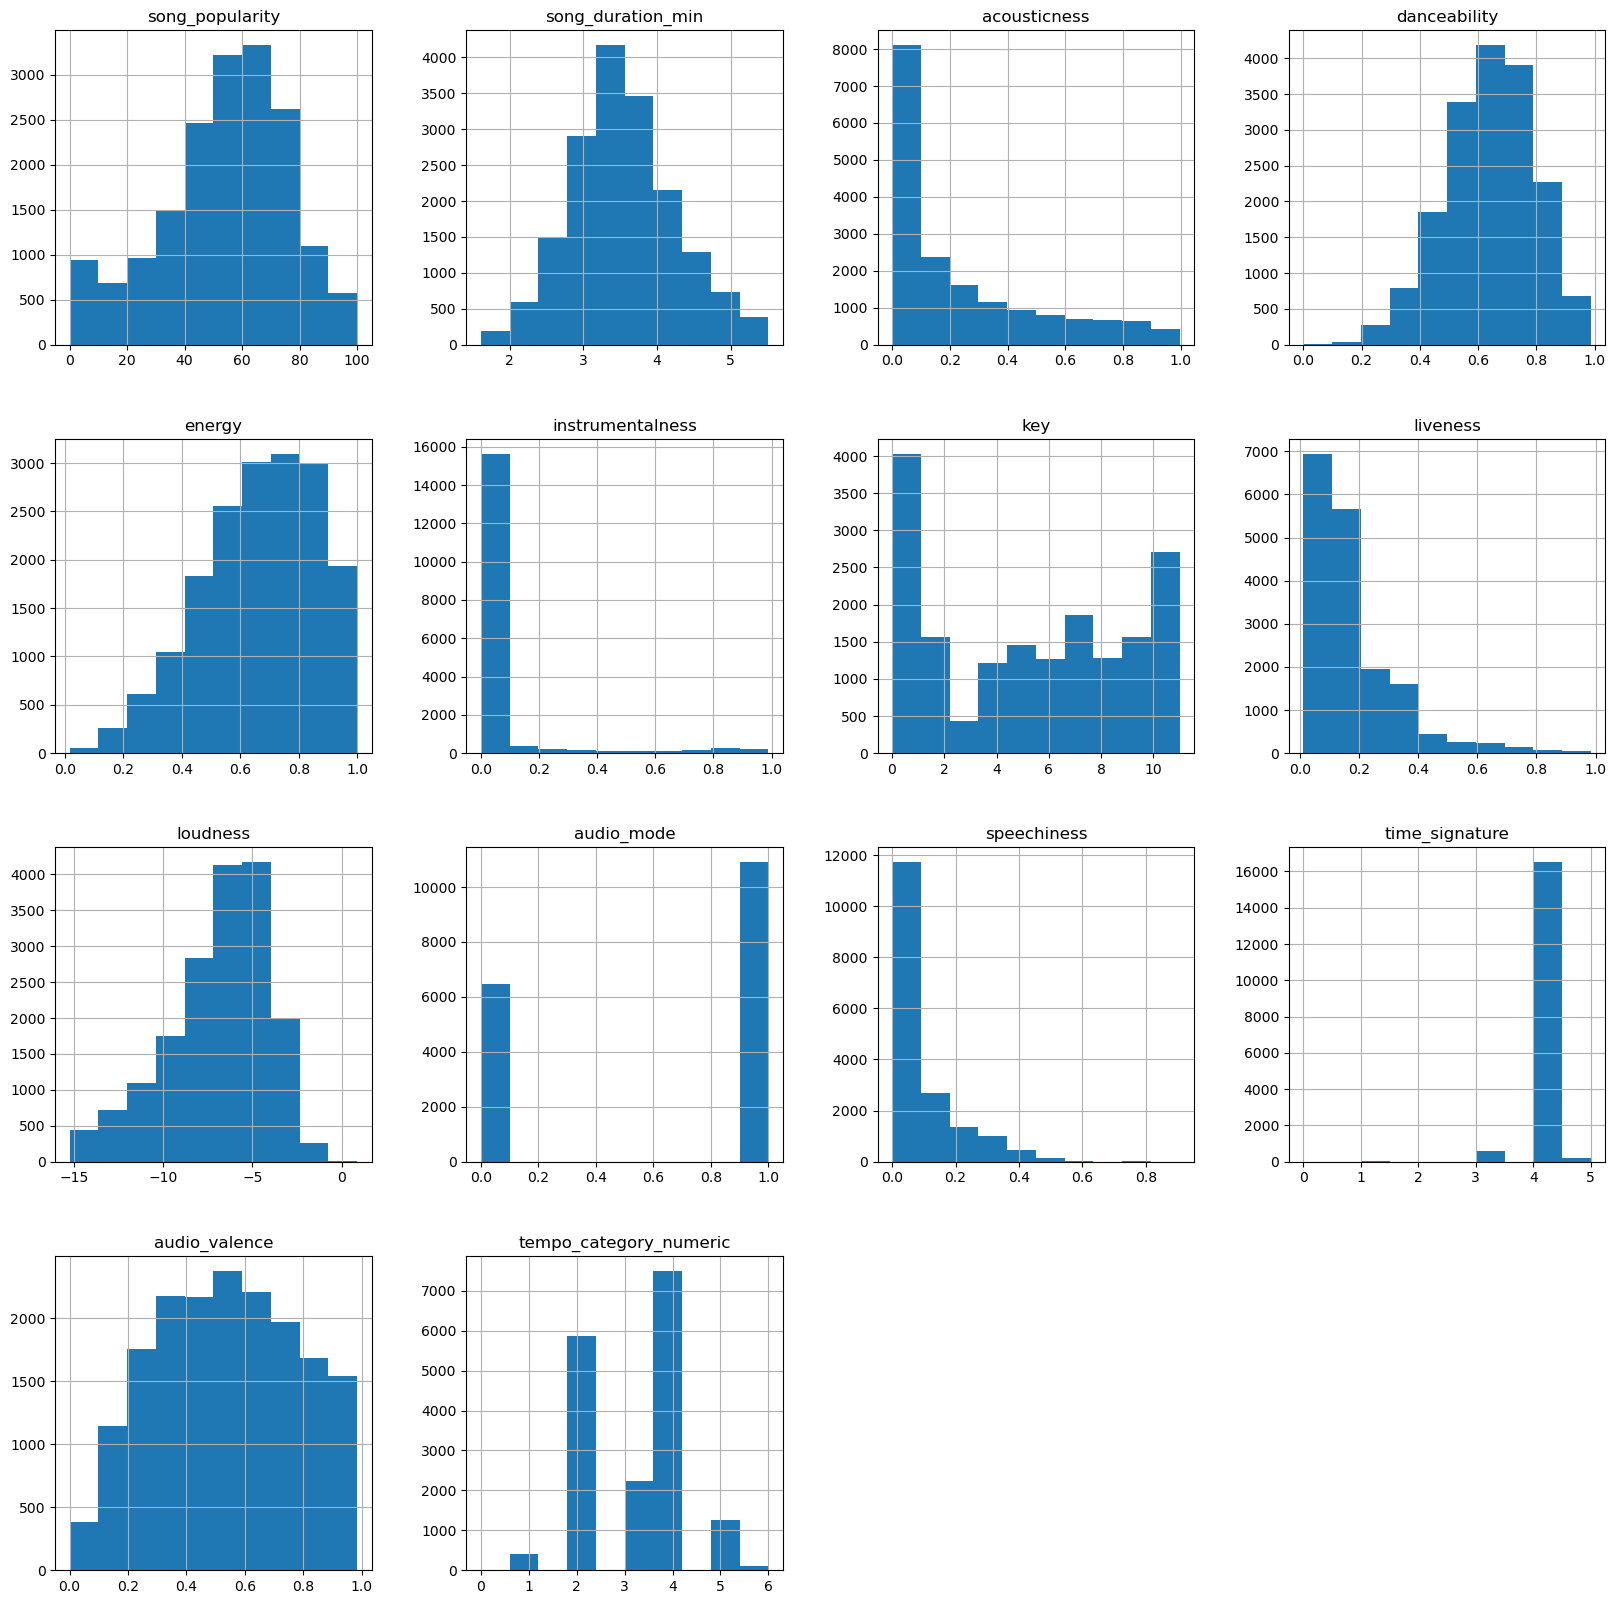

In [102]:
df3.hist(figsize=(20,20));

C:\Users\ACER\AppData\Local\Temp\ipykernel_9064\2442571274.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



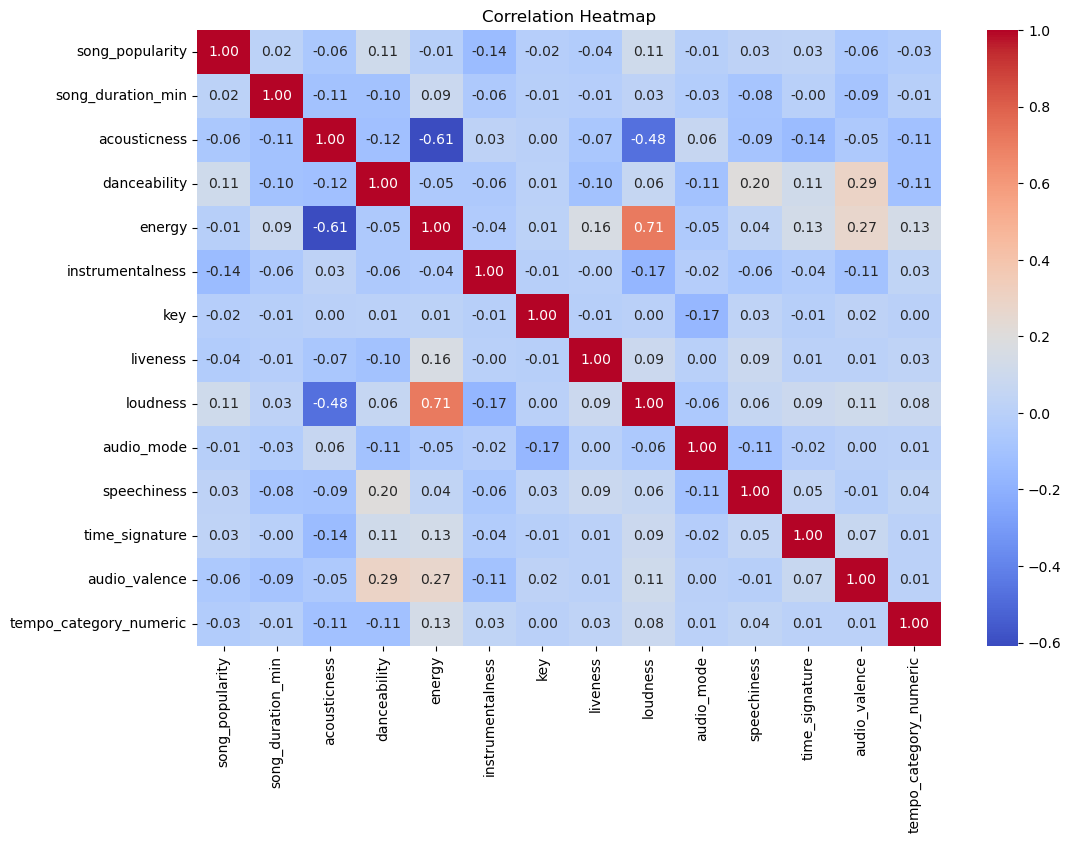

In [103]:
# Visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [104]:
k = 10
k_largest_corr = df3.corr().nlargest(k, 'song_popularity')
k_largest_feats = k_largest_corr['song_popularity'].index
list(k_largest_feats)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9064\3846785485.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



['song_popularity',
 'danceability',
 'loudness',
 'time_signature',
 'speechiness',
 'song_duration_min',
 'audio_mode',
 'energy',
 'key',
 'tempo_category_numeric']

# 7. Visualization

## a. Check Target Variable Distribution

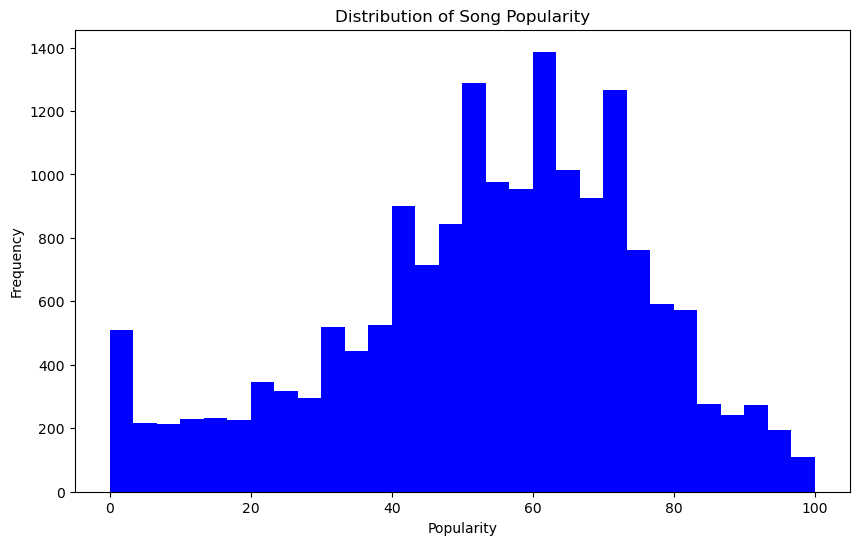

count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
25%         40.000000
50%         56.000000
75%         69.000000
max        100.000000
Name: song_popularity, dtype: float64


In [105]:
# distribusi target variable pada kolom 'Popularity' dan 'Frequency'
plt.figure(figsize=(10, 6))
plt.hist(df3['song_popularity'], bins=30, color='blue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# kita lihat statistik untuk target variable 'song_popularity'
print(df2['song_popularity'].describe())

## Pie Chart Kategorikal Columns
### Song Popularity

In [106]:
popularity_counts = df3['song_popularity'].value_counts()

# Menggunakan dictionary untuk membuat bar chart
bar_data = {
    'x': popularity_counts.index,  # Nama kategori (time signatures)
    'y': popularity_counts.values,  # Jumlah kemunculan
    'type': 'bar'  # Jenis plot bar
}

# Membuat layout untuk bar chart
layout = {
    'title': 'Distribusi Kategorikal Song Popularity',
    'xaxis': {'title': 'Song Popularity'},
    'yaxis': {'title': 'Frekuensi'}
}

# Menggabungkan data dan layout ke dalam dictionary untuk plot
fig_dict = {'data': [bar_data], 'layout': layout}

plto.iplot(fig_dict)

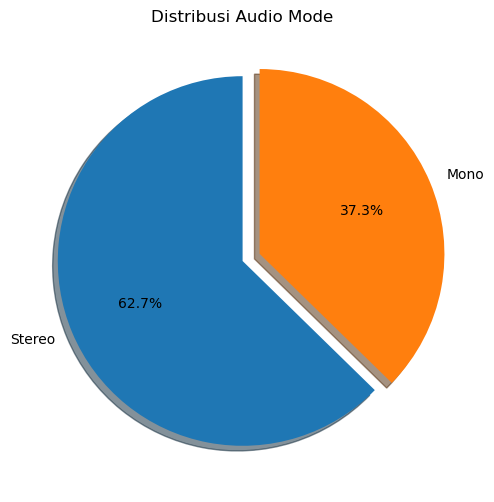

In [107]:
status_counts = df3['audio_mode'].value_counts()

# Nilai untuk meledak (explode)
explode = [0.1 if status == 0 else 0 for status in status_counts.index]

# Membuat diagram pie
plt.figure(figsize=(8, 6))
plt.pie(
    status_counts,
    labels=['Stereo', 'Mono'],
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Distribusi Audio Mode')
plt.show()

### Key

In [108]:
# Menggunakan dictionary untuk membuat bar chart
bar_data = {
    'x': value_counts_key.index,  # Nama kategori (time signatures)
    'y': value_counts_key.values,  # Jumlah kemunculan
    'type': 'bar'  # Jenis plot bar
}

# Membuat layout untuk bar chart
layout = {
    'title': 'Distribusi Kategorikal Key',
    'xaxis': {'title': 'Key'},
    'yaxis': {'title': 'Frekuensi'}
}

# Menggabungkan data dan layout ke dalam dictionary untuk plot
fig_dict = {'data': [bar_data], 'layout': layout}

plto.iplot(fig_dict)

In [109]:
time_counts = df3['time_signature'].value_counts()

# Menggunakan dictionary untuk membuat bar chart
bar_data = {
    'x': time_counts.index,  # Nama kategori (time signatures)
    'y': time_counts.values,  # Jumlah kemunculan
    'type': 'bar'  # Jenis plot bar
}

# Membuat layout untuk bar chart
layout = {
    'title': 'Distribusi Kategorikal Time Signature',
    'xaxis': {'title': 'Time Signature'},
    'yaxis': {'title': 'Frekuensi'}
}

# Menggabungkan data dan layout ke dalam dictionary untuk plot
fig_dict = {'data': [bar_data], 'layout': layout}

plto.iplot(fig_dict)

In [110]:
tempo_counts = df3['tempo_category_numeric'].value_counts()

# Menggunakan dictionary untuk membuat bar chart
bar_data = {
    'x': tempo_counts.index,  # Nama kategori (time signatures)
    'y': tempo_counts.values,  # Jumlah kemunculan
    'type': 'bar'  # Jenis plot bar
}

# Membuat layout untuk bar chart
layout = {
    'title': 'Distribusi Kategorikal Time Signature',
    'xaxis': {'title': 'Time Signature'},
    'yaxis': {'title': 'Frekuensi'}
}

# Menggabungkan data dan layout ke dalam dictionary untuk plot
fig_dict = {'data': [bar_data], 'layout': layout}

plto.iplot(fig_dict)

### Keterangan Kategori

0 #'Largo'
1 #'Adagio'
2 #'Andante'
3 #'Moderato'
4 #'Allegro'
5 #'Presto'

In [111]:
coulmn_to_drop = ['acousticness','instrumentalness','audio_valence','song_name','liveness']

df4 = df3.drop(columns = coulmn_to_drop)
df4.to_csv('data_will_model.csv', index=False)
df4

,song_popularity,song_duration_min,danceability,energy,key,loudness,audio_mode,speechiness,time_signature,tempo_category_numeric
0,73,4.372217,0.496,0.682,8,-4.095,1,0.0294,4,4.0
1,66,3.615550,0.542,0.853,3,-6.407,0,0.0498,4,2.0
2,76,3.862217,0.737,0.463,0,-7.828,1,0.0792,4,4.0
3,74,3.615550,0.451,0.970,0,-4.938,1,0.1070,4,4.0
4,56,3.730433,0.447,0.766,10,-5.065,1,0.0313,4,5.0
...,...,...,...,...,...,...,...,...,...,...
18828,64,3.602883,0.515,0.286,5,-11.776,1,0.0378,4,3.0
18829,62,3.251767,0.644,0.523,4,-7.660,1,0.0378,4,2.0
18831,60,3.427767,0.495,0.161,11,-14.078,0,0.0301,4,2.0
18832,23,3.036850,0.719,0.325,0,-12.222,1,0.0355,4,4.0


# 8. Scalling

In [112]:
df4 = pd.read_csv('data_will_model.csv')
df4

,song_popularity,song_duration_min,danceability,energy,key,loudness,audio_mode,speechiness,time_signature,tempo_category_numeric
0,73,4.372217,0.496,0.682,8,-4.095,1,0.0294,4,4.0
1,66,3.615550,0.542,0.853,3,-6.407,0,0.0498,4,2.0
2,76,3.862217,0.737,0.463,0,-7.828,1,0.0792,4,4.0
3,74,3.615550,0.451,0.970,0,-4.938,1,0.1070,4,4.0
4,56,3.730433,0.447,0.766,10,-5.065,1,0.0313,4,5.0
...,...,...,...,...,...,...,...,...,...,...
17373,64,3.602883,0.515,0.286,5,-11.776,1,0.0378,4,3.0
17374,62,3.251767,0.644,0.523,4,-7.660,1,0.0378,4,2.0
17375,60,3.427767,0.495,0.161,11,-14.078,0,0.0301,4,2.0
17376,23,3.036850,0.719,0.325,0,-12.222,1,0.0355,4,4.0


In [113]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numerical_cols = ['song_popularity','song_duration_min', 'danceability',
                 'energy', 'loudness','speechiness','time_signature','audio_mode','tempo_category_numeric']
df4[numerical_cols] = scaler.fit_transform(df4[numerical_cols])
df4

,song_popularity,song_duration_min,danceability,energy,key,loudness,audio_mode,speechiness,time_signature,tempo_category_numeric
0,0.607143,0.964609,-0.739130,-0.010399,8,0.613172,0.0,-0.320799,0.0,0.0
1,0.357143,0.123935,-0.516908,0.582322,3,-0.008333,-1.0,-0.081081,0.0,-1.0
2,0.714286,0.397987,0.425121,-0.769497,0,-0.390323,0.0,0.264395,0.0,0.0
3,0.642857,0.123935,-0.956522,0.987868,0,0.386559,0.0,0.591069,0.0,0.0
4,0.000000,0.251573,-0.975845,0.280763,10,0.352419,0.0,-0.298472,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...
17373,0.285714,0.109862,-0.647343,-1.383016,5,-1.451613,0.0,-0.222092,0.0,-0.5
17374,0.214286,-0.280237,-0.024155,-0.561525,4,-0.345161,0.0,-0.222092,0.0,-1.0
17375,0.142857,-0.084697,-0.743961,-1.816291,11,-2.070430,-1.0,-0.312573,0.0,-1.0
17376,-1.178571,-0.519015,0.338164,-1.247834,0,-1.571505,0.0,-0.249119,0.0,0.0


# 9. Modelling

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Pisahkan fitur dan target
X = df4.drop('song_popularity', axis=1)  # Fitur
y = df4['song_popularity']  # Target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Membuat model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 10.Evaluation

In [115]:
# Membuat prediksi
y_pred = model.predict(X_test)

# Mengukur performa model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.3777689932854311
R² Score: 0.37972106887925816
